### `Basic Time Series Metrics and Resampling`


#### `01: Compare the performance of several asset classes`
We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`.

- Import `'asset_classes.csv'`, using `.read_csv()` to parse dates in the `'DATE'` column and set this column as the index, then assign the result to `prices`.
- Select the first price for each series using `.iloc[0]` on `prices` and assign the result to `first_prices`.
- Divide `prices` by `first_prices`, multiply by 100 and assign the result to `normalized`.
- Plot `normalized`.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


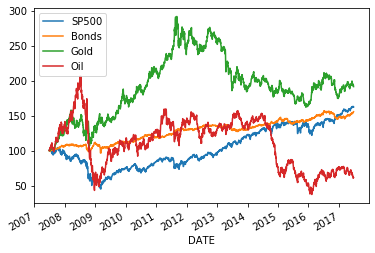

In [3]:
# Import data here
prices = pd.read_csv("datasets/asset_classes.csv", parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices) * 100

# Plot normalized
normalized.plot()
plt.show()


#### `02: Comparing stock prices with a benchmark`
You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:
- Johnson & Johnson: JNJ
- Exxon Mobil: XOM
- JP Morgan Chase: JPM
  

We have already imported pandas as pd and matplotlib.pyplot as plt.

- Use `pd.read_csv()` to import `'nyse.csv'` and `'dow_jones.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `dow_jones`, respectively.
- Use `pd.concat()` along `axis=1` to combine `stocks` and `dow_jones` and assign the result to `data`. Inspect the `.info()` of `data`.
- Divide `data` by the first value for each series, multiply by 100 and plot the result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


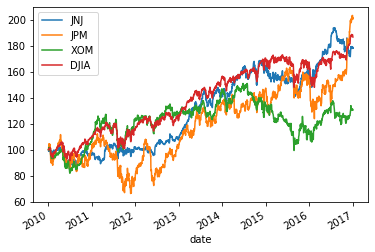

In [4]:
# Import stock prices and index here
stocks = pd.read_csv('datasets/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('datasets/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()

#### `03: Plot performance difference vs benchmark index`
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

We have already imported `pandas` as `pd` and` matplotlib.pyplot` as `plt`.

- Create the list `tickers` containing the two stock symbols.
- Use `pd.read_csv()` to import `'msft_aapl.csv'` and `'sp500.csv'`, creating a `DatetimeIndex` for each from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `stocks` and `sp500`, respectively.
- Use `pd.concat()` to concatenate `stocks` and `sp500` along `axis=1`, apply `.dropna()` to drop all missing values, and assign the result to `data`.
- Normalize `data` by dividing by the first price, multiply by 100 and assign the output to `normalized`.
- Select `tickers` from `normalized`, and subtract `normalized['SP500']` with keyword `axis=0` to align the indexes, then plot the result.